# Cointegration Models


**What is Cointegration?**

* Two series, $\large P_t$ and $\large Q_tQ$ can be random walks
* But the linear combination $\large P_t - c \ Q_tP$  may not be a random walk!
* If that's true 
  * $\large P_t - c \ Q_tP$ is forcastable
  * $\large P_tP$ and $\large Q_tQ$ are said to be **cointegrated**

**Analogy: Dog on a Leash**
* $\large P_t$ = Owner
* $\large Q_t$ = Dog
* Both series look like a random walk
* Difference, or distance betweem them, looks mean reverting
 * If dog falls too far behind, it gets pulled forward
 * If dog gets too far ahead, it gets pulled back
 
 In this case, the dog and owener are linked together and are a mean reverting process

**Example**

Heating Oil and Natural Gas both look like random walks...

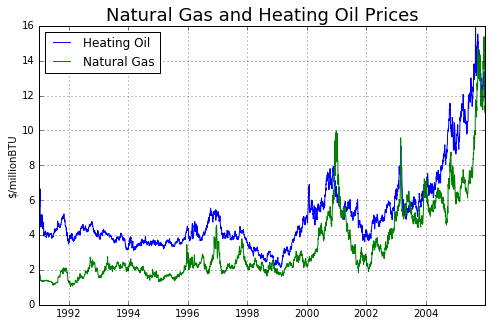

But the spread (difference) is mean reverting

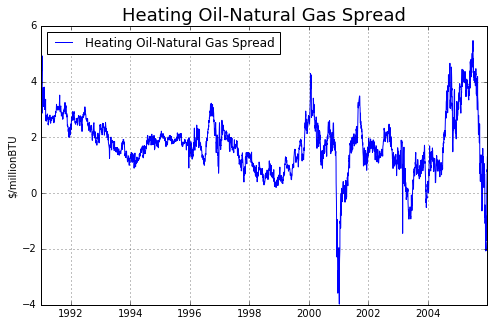

**Two Steps to Test for Cointegration**



Two Steps to Test for Cointegration
* Regress $\large P_t$  on $\large Q_t$ and get slope $\large c$
* Run Augmented Dickey-Fuller test on $\large P_t - c \ Q_t$ to test for random walk

 


In [ ]:
# Alternatively, can use coint function in statsmodels that combines both steps
from statsmodels.tsa.stattools import coint
coint(P,Q)

## A Dog on a Leash? (Part 1)

The Heating Oil and Natural Gas prices are pre-loaded in DataFrames HO and NG. First, plot both price series, which look like random walks. Then plot the difference between the two series, which should look more like a mean reverting series (to put the two series in the same units, we multiply the heating oil prices, in $\$$/gallon, by 7.25, which converts it to $\$$/millionBTU, which is the same units as Natural Gas).

The data for continuous futures (each contract has to be spliced together in a continuous series as contracts expire) was obtained from Quandl.

In [ ]:
# Plot the prices separately
plt.subplot(2,1,1)
plt.plot(7.25*HO, label='Heating Oil')
plt.plot(NG, label='Natural Gas')
plt.legend(loc='best', fontsize='small')

# Plot the spread
plt.subplot(2,1,2)
plt.plot(7.25*HO-NG, label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')
plt.show()

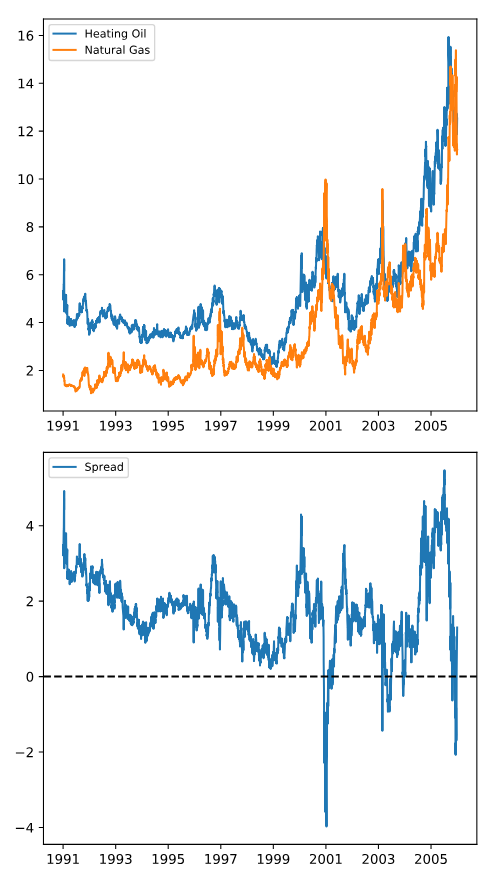

*Notice from the plot that when Heating Oil briefly dipped below Natural Gas, it quickly reverted back up.*

# A Dog on a Leash? (Part 2)


To verify that HO and NG are cointegrated, First apply the Dickey-Fuller test to HO and NG separately to show they are random walks. Then apply the test to the difference, which should strongly reject the random walk hypothesis. The Heating Oil and Natural Gas prices are pre-loaded in DataFrames HO and NG.

In [ ]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Compute the ADF for HO and NG
result_HO = adfuller(HO['Close'])
print("The p-value for the ADF test on HO is ", result_HO[1])
result_NG = adfuller(NG['Close'])
print("The p-value for the ADF test on NG is ", result_NG[1])

# Compute the ADF of the spread
result_spread = adfuller(7.25 *HO['Close'] - NG['Close'])
print("The p-value for the ADF test on the spread is ", result_spread[1])

In [ ]:
The p-value for the ADF test on HO is  0.956710878502
The p-value for the ADF test on NG is  0.900874744468
The p-value for the ADF test on the spread is  7.01943930214e-05

*As we expected, we cannot reject the hypothesis that the individual futures are random walks, but we can reject that the spread is a random walk.*

# Are Bitcoin and Ethereum Cointegrated?


Cointegration involves two steps: regressing one time series on the other to get the cointegration vector, and then perform an ADF test on the residuals of the regression. In the last example, there was no need to perform the first step since we implicitly assumed the cointegration vector was (1,−1). In other words, we took the difference between the two series (after doing a units conversion). Here, you will do both steps.

You will regress the value of one cryptocurrency, bitcoin (BTC), on another cryptocurrency, ethereum (ETH). If we call the regression coefficient b, then the cointegration vector is simply (1,−b). Then perform the ADF test on BTC −b ETH. Bitcoin and Ethereum prices are pre-loaded in DataFrames BTC and ETH.

Bitcoin data are in DataFrame BTC and Ethereum data are in ETH.

In [ ]:
# Import the statsmodels module for regression and the adfuller function
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Regress BTC on ETH
ETH = sm.add_constant(ETH)
result = sm.OLS(BTC,ETH).fit()

# Compute ADF
b = result.params[1]
adf_stats = adfuller(BTC['Price'] - b*ETH['Price'])
print("The p-value for the ADF test is ", adf_stats[1])

In [ ]:
The p-value for the ADF test is  0.0233690023235

The data suggests that Bitcoin and Ethereum are cointegrated.

# Case Study: Climate Change

* Test Random Walk - Diki Fuller test
* Transform to stationary series - First Differences
* Compute ACF and PACF 
* Using the above to guide the fitting of AR, MA and ARMA models
* Use information criterion to choose best model
* Forcast tempratures for next 40 years

## Is Temperature a Random Walk (with Drift)?

An ARMA model is a simplistic approach to forecasting climate changes, but it illustrates many of the topics covered in this class.

The DataFrame temp_NY contains the average annual temperature in Central Park, NY from 1870-2016 (the data was downloaded from the NOAA here). Plot the data and test whether it follows a random walk (with drift).

In [ ]:
# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller

# Convert the index to a datetime object
temp_NY.index = pd.to_datetime(temp_NY.index, format='%Y')

# Plot average temperatures
temp_NY.plot()
plt.show()

# Compute and print ADF p-value
result = adfuller(temp_NY['TAVG'])
print("The p-value for the ADF test is ", result[1])

In [ ]:
The p-value for the ADF test is  0.583293898787

*The data seems to follow a random walk with drift.*

## Getting "Warmed" Up: Look at Autocorrelations

Since the temperature series, temp_NY, is a random walk with drift, take first differences to make it stationary. Then compute the sample ACF and PACF. This will provide some guidance on the order of the model.

In [ ]:
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()

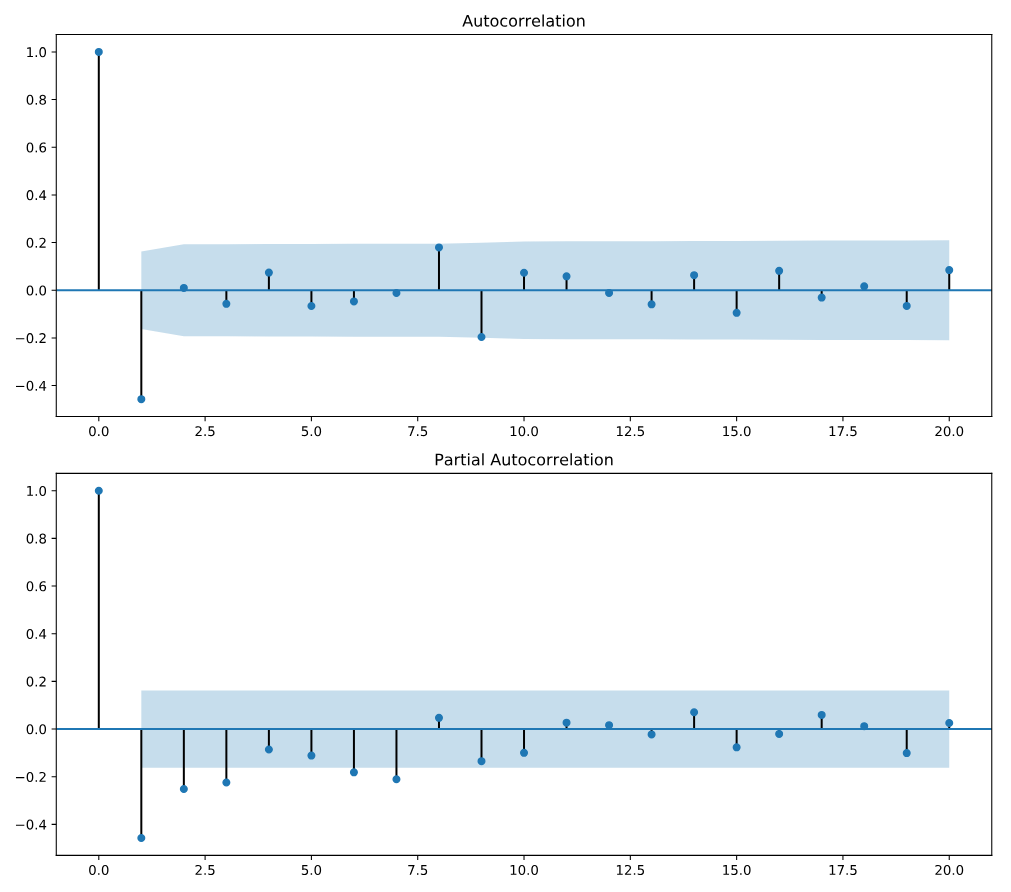

*There is no clear pattern in the ACF and PACF except the negative lag-1 autocorrelation in the ACF.*

## Which ARMA Model is Best?


Fit the temperature data to an AR(1), AR(2), MA(1), and ARMA(1,1) and see which model is the best fit, using the AIC criterion.

In [ ]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(1) model and print AIC:
mod = ARMA(chg_temp, order=(1,0))
res = mod.fit()
print("The AIC for an AR(1) is: ", res.aic)

# Fit the data to an AR(2) model and print AIC:
mod = ARMA(chg_temp, order=(2,0))
res = mod.fit()
print("The AIC for an AR(2) is: ", res.aic)

# Fit the data to an MA(1) model and print AIC:
mod = ARMA(chg_temp, order=(0,1))
res = mod.fit()
print("The AIC for an MA(1) is: ", res.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod = ARMA(chg_temp, order=(1,1))
res = mod.fit()
print("The AIC for an ARMA(1,1) is: ", res.aic)

The AIC for an AR(1) is:  510.5346898313911
The AIC for an AR(2) is:  501.9274123160229
The AIC for an MA(1) is:  469.3909735015812
The AIC for an ARMA(1,1) is:  469.0729116169711

*The MA(1) and ARMA(1,1) have the two lowest AIC values.*

## Don't Throw Out That Winter Coat Yet


Finally, you will forecast the temperature over the next 30 years using an ARMA(1,1) model, including confidence bands around that estimate. Keep in mind that the estimate of the drift will have a much bigger impact on long range forecasts than the ARMA parameters.

Earlier, you determined that the temperature data follows a random walk and you looked at first differencing the data. You will use the ARIMA module on the temperature data, pre-loaded in the DataFrame temp_NY, but the forecast would be the same as using the ARMA module on changes in temperature, and then using cumulative sums of these changes to get the temperature.

The data is in a DataFrame called temp_NY.

In [ ]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA

# Forecast interest rates using an AR(1) model
mod = ARIMA(temp_NY, order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start='1872-01-01', end='2046-01-01')
plt.show()

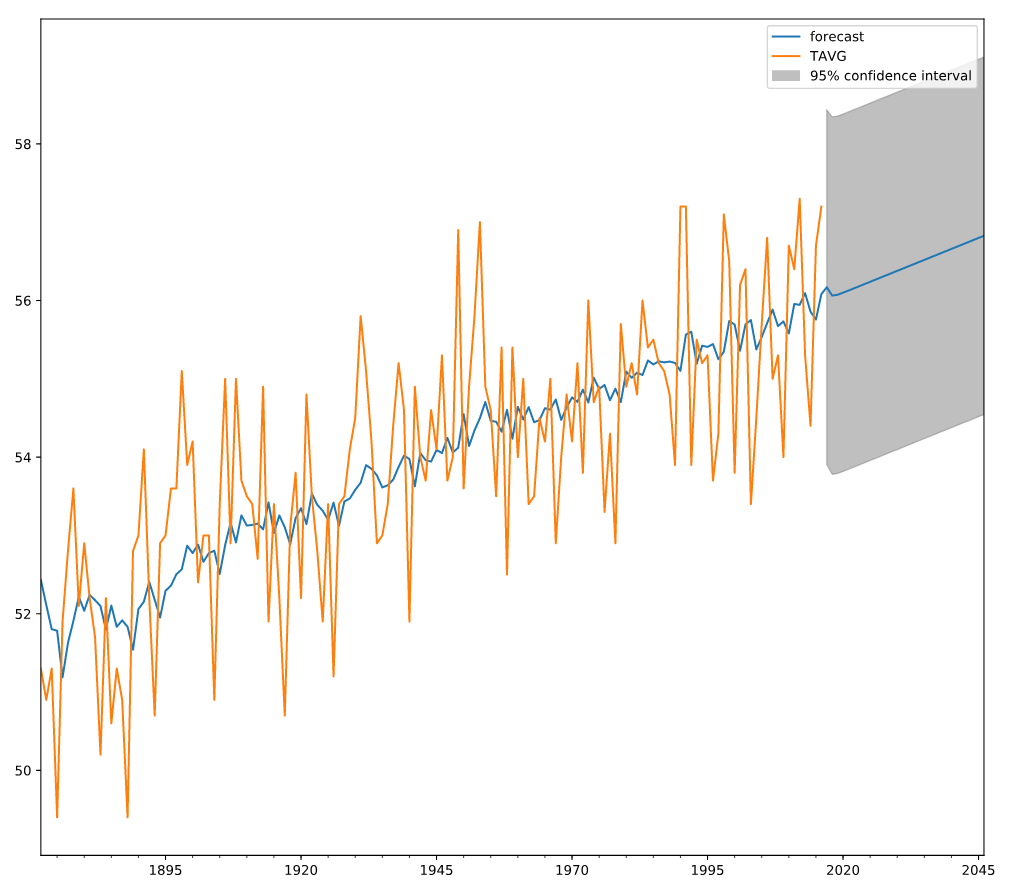

*According to the model (almost entirely due to the trend, the temperature is expected to be about 0.6 degrees higher in 30 years, but the 95% confidence interval around that is over 5 degrees.*

# Further Topics

* GARCH Models
* Nonlinear Models
* Multivariate Time Series Models
* Regime Switching Models
* State Space Models and Kalman Filtering